<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.955 · Models avançats de mineria de dades · PAC1</p>
<p style="margin: 0; text-align:right;">2018-1 · Màster universitari en Ciència de dades (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis de Informàtica, Multimèdia i Telecomunicacions</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PAC 1: Preparació de dades

Al llarg d'aquesta pràctica veurem com aplicar diferents tècniques per a la càrrega i preparació de dades:

 <ol start="1">
  <li>Càrrega de conjunts de dades</li>
  <li>Anàlisis de les dades
  <br>2.1 Anàlisis estadístic bàsic
  <br>2.2 Anàlisis exploratori de les dades
  <li>Reducció de la dimensionalitat</li>
  <li>Aplicació de CART</li>
</ol>
   
Per a això necessitarem les següents llibreries:

In [1]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.set_option('display.max_columns', None)

# 1. Càrrega de conjunts de dades (1 punt)

En primer lloc, heu de carregar el conjunt de dades Breast Cancer Wisconsin (més informació a l'enllaç https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). Es pot descarregar d'Internet o es pot carregar directament desde la llibreria "scikit-learn", que incorpora un conjunt de datasets molt coneguts i usats per a la mineria de dades i machine learning (http://scikit-learn.org/stable/datasets/index.html).

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementació:</strong> Carregueu el conjunt de dades "Breast Cancer Wisconsin" i mostreu el número i nom dels atributs (variables que podrien ser usades per a predir la resposta "Diagnosis"), així com el número de files obtingudes.
<hr>
Suggeriment: si useu sklearn (sklearn.datasets.load_breast_cancer), exploreu les diferents 'keys' de l'objecte obtingut.
</div>

Carreguem les dades:

In [2]:
dataset = datasets.load_breast_cancer()

Mirem de quin tipus són aquestes dades:

In [3]:
type(dataset)

sklearn.utils.Bunch

Resulta que són del tipus Bunch. La documentació d'aquest dataset diu el següent:

*Dictionary-like object, the interesting attributes are: ‘data’, the data to learn, ‘target’, the classification labels, ‘target_names’, the meaning of the labels, ‘feature_names’, the meaning of the features, and ‘DESCR’, the full description of the dataset, ‘filename’, the physical location of breast cancer csv dataset (added in version 0.20).*

Per tant, tenim que ĺes dades venen donades en un format semblant a un diccionari. Anem a veure les claus d'aquesta mena de diccionari:

In [4]:
dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

Passem a veure la descripció:

In [5]:
dataset.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance,

La descripció surt en un format poc adient per la lectura. Anem a veure quin tipus és:

In [6]:
type(dataset.DESCR)

str

Es tracta d'un simple string. Per veure-ho correctament formatejat, emprem la funció print:

In [7]:
print(dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

Aquesta descripció ens diu que tenim 569 files o instàncies i 30 atributs. Anem a veure-ho:

In [8]:
len(dataset.data)

569

In [9]:
len(dataset.data[0])

30

Els resultats que obtenim concorden amb la descripció. Passem ara a veure els noms d'aquests 30 atributs:

In [10]:
print(dataset.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


I per últim, passem a veure quins sóm els possibles valors en que es classifiquen les dades:

In [11]:
print(dataset.target_names)

['malignant' 'benign']


Els tumors poden ser malignes o benignes.

# 2. Anàlisis de les dades

## 2.1 Anàlisis estadístic bàsic (1 punt)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementació:</strong> Realitzeu un anàlisis estadístic bàsic indicant, per a cada atribut numèric del conjunt de dades, el seu valor mitjà i la seva desviació estàndard. Per a les variables categòriques (en els atributs o la resposta, si ho són), mostreu la frequència amb la qual apareixen les diferents classes.
<hr>
Suggeriment: podeu usar la llibreria 'pandas' i les seves funcions 'describe' i 'value_counts'
</div>

Segons la descripció, tots els atributs són numèrics, per la qual cosa podem aplicar-els-hi un anàlisis estadístic a tots ells. Passem a utilitzar la funció *describe* de pandas, que és una funció aplicable a dataframes, i per això primer hem de transformar les nostres dades en un dataframe:

In [12]:
dades = pd.DataFrame(data=dataset.data,columns=dataset.feature_names)

In [13]:
dades.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Amb aquesta funció hem obtingut un anàlisis estadístic de tots els atributs.

En els atributs no tenim variables categòriques. Anem a veure-hi la freqüència en la que apareixen les diferents classes. Com que la funció *value_counts* s'aplica a Series, primer transformem les dades del *target* en tipus Series:

In [14]:
target = pd.Series(dataset.target)
target.value_counts()

1    357
0    212
dtype: int64

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisis:</strong> Comenteu els resultats.
</div>

Veiem que les dues funcions utilitzades són molt adients per realitzar anàlisis estadístics, tant de variables numèriques com categòriques. 

En el cas del target, la resposta, veiem que la freqüència que ens dóna concorda amb la que ens diu la descripció del dataset:

*Class Distribution: 212 - Malignant, 357 - Benign*

En el cas de les variables numèriques, l'anàlisis estadístic ens proporciona els següents estadístics: 
- count: el número de valors.
- mean: la mitjana.
- std: la desviació estàndard.
- min: el valor mínim.
- 25%: percentil del 25%.
- 50%: percentil del 50%.
- 75%: percentil del 75%.
- max: el valor màxim.

## 2.2 Anàlisis exploratori de les dades (3 punts)

En aquest exercici explorarem la relació d'alguns dels atributs numèrics amb la variable resposta ("Diagnosis"), tant gràficament com quantitativament. Per començar, seleccioneu els 4 atributs que voleu explorar. Si esteu usant els noms de columnes proporcionats per sklearn, una llista de possibles noms d'atributs seria:

In [15]:
feats_to_explore = ['mean radius', 'mean texture', 'mean smoothness', 'mean symmetry']

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementació:</strong> Utilitzant una llibreria gràfica, com per exemple "matplotlib", realitzeu un gràfic de l'histograma de valors per a cada un dels atributs seleccionats, separats pels valors de classe de la resposta ("Diagnosis"). La finalitat és observar com es distribueix cadascun dels atributs en funció del valor de classe que tinguin, per a poder identificar de forma visual i ràpida si alguns atributs permeten diferenciar de forma clara els diferents diagnòstics dels tumors.
</div>

Anem a realitzar les representacions gràfiques amb ajuda de la llibreria *matplotlib*.

In [16]:
dades_maligne = dades[target==0]
dades_benigne = dades[target==1]

/home/lluis/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


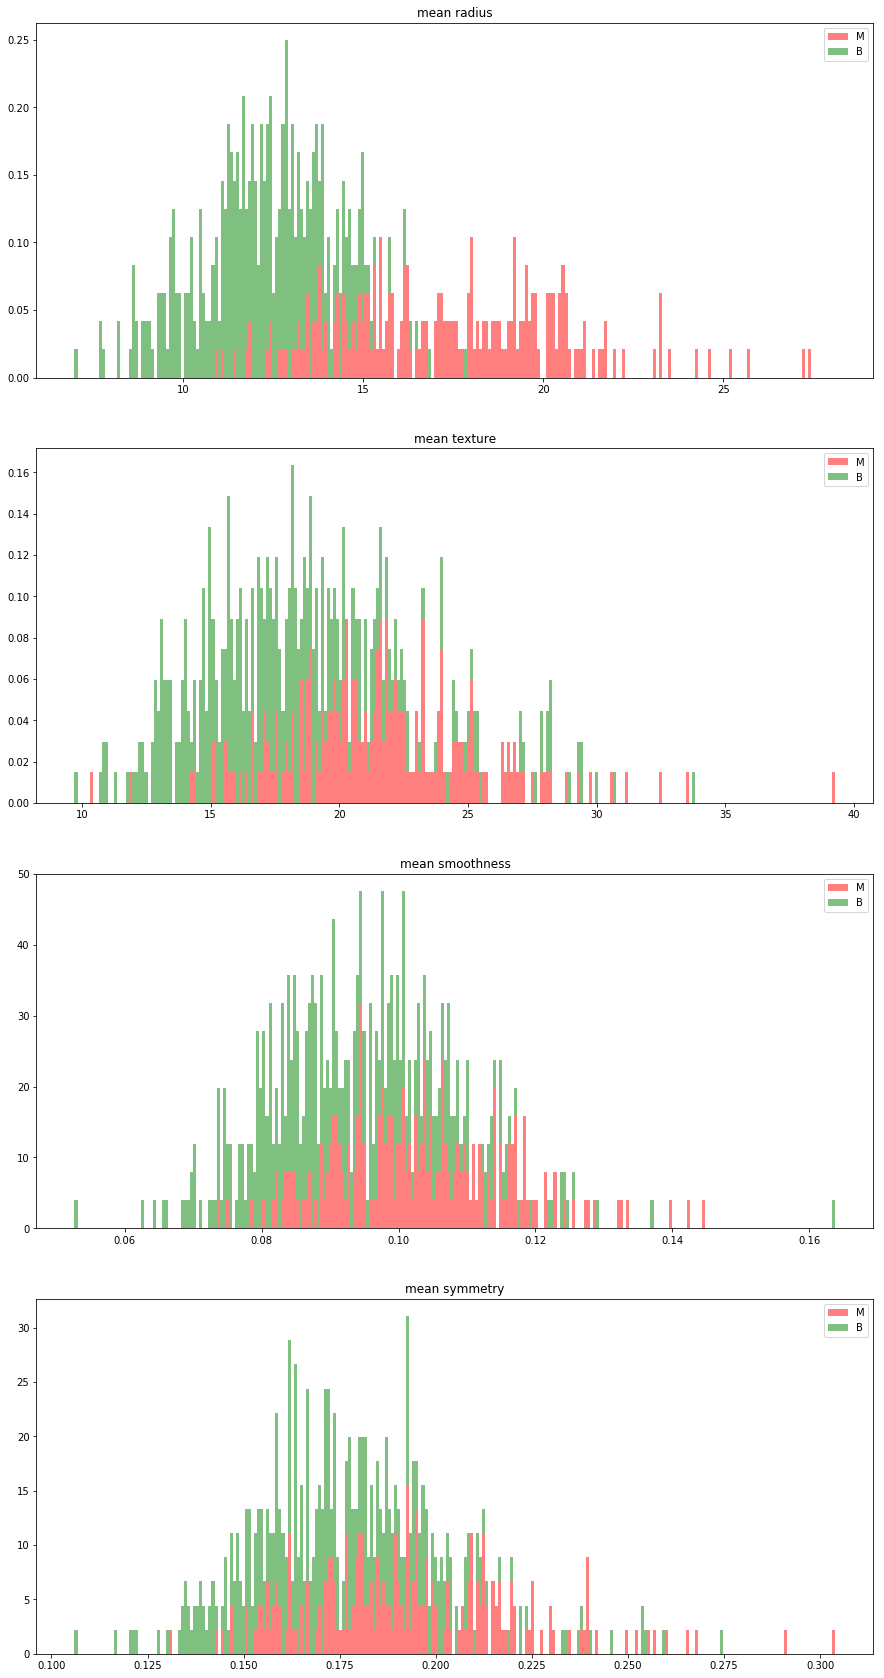

In [17]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15,30))
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(dades[feats_to_explore[idx]]) - min(dades[feats_to_explore[idx]]))/250
    ax.hist([dades_maligne[feats_to_explore[idx]],dades_benigne[feats_to_explore[idx]]], 
            bins=np.arange(min(dades[feats_to_explore[idx]]), max(dades[feats_to_explore[idx]]) + binwidth, binwidth) , 
            alpha=0.5,
            stacked=True, 
            normed = True, 
            label=['M','B'],
            color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(feats_to_explore[idx])
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementació:</strong> Per a cada un dels atributs representats en l'exercici anterior, mostreu la mitjana i la desviació estàndard per a cada valor de classe de la resposta ("Diagnosis"). La finalitat és verificar numèricament les diferències identificades anteriorment de forma visual.
</div>

In [18]:
dades_maligne[feats_to_explore].describe().loc[['mean', 'std']]

,mean radius,mean texture,mean smoothness,mean symmetry
mean,17.462830,21.604906,0.102898,0.192909
std,3.203971,3.779470,0.012608,0.027638


In [19]:
dades_benigne[feats_to_explore].describe().loc[['mean', 'std']]

,mean radius,mean texture,mean smoothness,mean symmetry
mean,12.146524,17.914762,0.092478,0.174186
std,1.780512,3.995125,0.013446,0.024807


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisis:</strong>
<br> - Mirant els gràfics, quins atributs et sembla que tenen valors clarament diferents per a diagnòstics benignes i malignes? Quins atributs no?
<br> - Mirant els valors mitjans i les desviacions estàndard calculades, et semblen significatives les diferències per a diagnòstics benignes i malignes?
<br> - BONUS: quin test estadístic podries usar per comparar les distribucions dels valors dels atributs quan els diagnòstics són benignes o malignes? Usa'l per evaluar quins atributs (d'entre tots els del conjunt de dades) tenen valors més semblants en tumors benignes i malignes. Interpreta el resultat.
</div>

Mirant els gràfics, veiem que dels quatre atributs representats sobre tot el primer, *mean radius*, i en menor consideració el segon, *mean texture*, permeten diferenciar de forma clara els diferents diagnòstics dels tumors, mostrant com per valors de *mean radius* menors de al voltant de 14 els tumors solen ser benignes i a partir d'aquesta mida és més probable que siguin malignes. Els altres dos atributs, *mean smoothness* i *mean symmetry* no permeten diferenciar gaire entre tumors malignes i benignes.

Pels atributs *mean radius* i *mean texture* les diferències que s'observen són prou significatives, encara que per sí soles no crec que fossin molt fiables per a predir el tipus de tumor. Pels altres dos atributs les diferències no són gairebé gens significatives.

# 3. Reducció de la dimensionalitat (2 punts)

En aquest exercici hauràs d'aplicar mètodes de reducció de la dimensionalitat al conjunt original de dades. L'objectiu és reduïr el conjunt d'atributs a un nou conjunt amb menys dimensions.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementació:</strong> Apliqueu els mètodes de reducció de la dimensionalitat:
<br>- Principal Component Analysis (PCA)
<br>- t-distributed Stochastic Neighbor Embedding (t-SNE)
<br>per a reduïr el conjunt de dades a 2 dimensions.

<hr>
Suggeriment: No és necessari que programeu els algorismes, poder usar les implementacions disponibles en la llibreria "scikit-learn".
</div>

Apliquem PCA i t-SNE:

In [20]:
pca = PCA(n_components=2)
pca = pca.fit_transform(dades) 

In [21]:
tsne = TSNE(verbose=1, perplexity=40, n_iter= 10000)
tsne = tsne.fit_transform(dades)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.036s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 33.679703
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.706345
[t-SNE] KL divergence after 2550 iterations: 0.221617


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementació:</strong> Genereu un gràfic (en 2D) amb el resultat de cada un dels mètodes de reducció de les dimensions, usant colors diferents per a cada classe de la resposta, amb l'objectiu de visualitzar si és possible separar eficientment les classes usant aquests mètodes.</div>

Generem el gràfic pel mètode PCA:

Text(0.5, 1.0, 'PCA Scatter Plot')

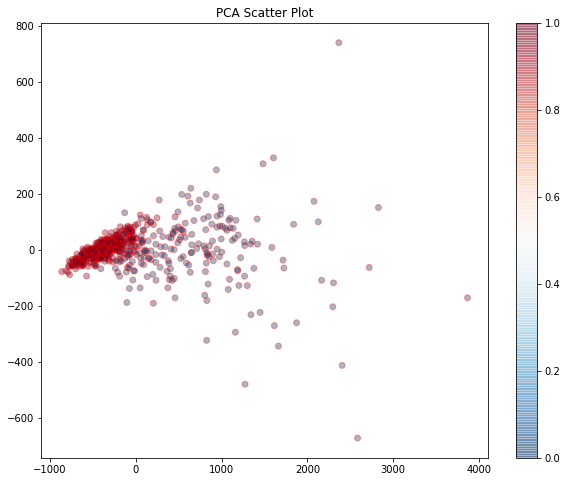

In [22]:
plt.figure(figsize = (10,8))
plt.scatter(pca[:,0],pca[:,1], c = target, cmap = "RdBu_r", edgecolor = "Red", alpha=0.35)
plt.colorbar()
plt.title('PCA Scatter Plot')

Generem el gràfic pel mètode PCA:

Text(0.5, 1.0, 't-SNE Scatter Plot')

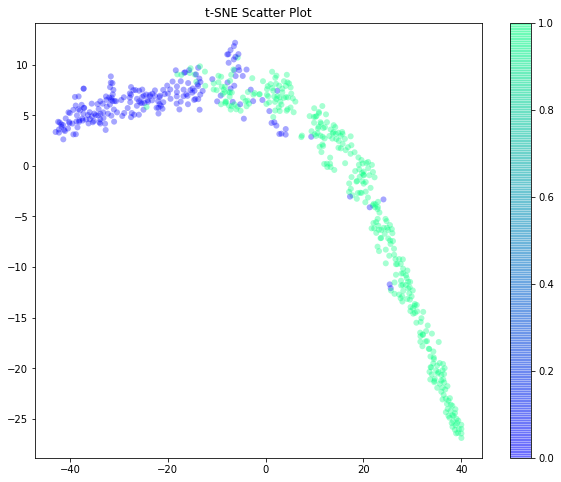

In [23]:
plt.figure(figsize = (10,8))
plt.scatter(tsne[:,0],tsne[:,1],  c = target, cmap = "winter", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('t-SNE Scatter Plot')

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisis:</strong>
<br> - Quin mètode de reducció de la dimensionalitat ha resultat més efectiu per a visualitzar les dues classes de diagnòstic de forma separada?
<br> - BONUS: quan és més apropiat usar PCA o t-SNE?
</div>

**Quin mètode de reducció de la dimensionalitat ha resultat més efectiu per a visualitzar les dues classes de diagnòstic de forma separada?**
A primer cop d'ull els dos mètodes semblen prou bons per a visualitzar les dues classes de diagnòstic de forma separada, encara que amb el t-SNE es visualitza millor la separació de les dues classes de diagnòstic.

**BONUS: quan és més apropiat usar PCA o t-SNE?**
El mètode t-SNE és més exigent computacionalment, i en cas de datasets amb molts atributs és poc adequat utilitzar-lo, i és preferible emprar un altre mètode, com el PCA. A més, el mètode t_SNE escala quadràticament amb el nombre de files, i per tant la seva aplicabilitat està limitada a datasets amb només uns quants milers de files, ja que per valorés més alts els requeriments de memòria esdevenen massa grans i el procés és massa lent com per resultar pràctic. Però un punt a favor del mètode t-SNE és que és més adequat que el PCA pel cas en que volguem visualitzar datasets amb moltes files. Per tant, tenim que Si volem una bona visualització de la separació de les classes el millor serà utilitzar el mètode t-SNE, però si tenim més d'uns quant milers de files al dataset el cost computacional i temporal pot ser massa gran i preferirem el mètode PCA.


# 4. Aplicació de CART (3 punts)

En aquest últim exercici es tracta d'aplicar un mètode d'aprenentatge supervisat, concretament els arbres de decisió, per a predir el diagnòstic de càncer de mama (tumor benigne o maligne) i evaluar la precisió obtinguda amb el model, usant:

- El conjunt de dades original amb tots els atributs
- El conjunt de dades reduït a només 2 atributs amb el mètode PCA

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementació:</strong> Entreneu dos models usant arbres de decisió (amb una profunditat màxima limitada a 3 nivells per a mantenir el model simple): un usant el conjunt de dades original i l'altre usant el conjunt de dades reduït amb PCA.
<br>Calculeu la precisió de les prediccions obtingudes per cadascun dels models (accuracy) així com la matriu de confusió associada.
<hr>
Suggeriment: és necessari que genereu un conjunt de dades d'entrenament per a calibrar el model, i un altre conjunt de test per a evaluar la bondat de cadascun dels models creats. Podeu usar els mòduls 'train_test_split', 'DecisionTreeClassifier' i les funcions dins del mòdul 'metrics' de sckit-learn.
</div>

Primer de tot generem les dades d'entrenament i de test:

In [24]:
X_train, X_test, y_train, y_test = train_test_split(dades, target, test_size = 0.25, random_state = 42)

Ara, entrenem el model amb les dades originals:

In [25]:
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train, y_train)
prediction = dtc.predict(X_test)

Calculem i mostrem l'*accuracy* i la matriu de confusió:

In [26]:
accuracy = accuracy_score(prediction, y_test)
print("Accuracy: {0:.2%}".format(accuracy))

Accuracy: 95.10%


In [27]:
confusion = confusion_matrix(y_test, prediction)
print(confusion)

[[50  4]
 [ 3 86]]


Ara tornem a generar les dades d'entrenament i de test, però considerant el resultat obtingut en l'apartat anterior pel PCA:

In [28]:
X_train, X_test, y_train, y_test = train_test_split(pca, target, test_size = 0.25, random_state = 42)

I ara entrenem el model amb les dades reduïdes amb PCA:

In [29]:
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train, y_train)
prediction = dtc.predict(X_test)

Calculem i mostrem l'*accuracy* i la matriu de confusió:

In [30]:
accuracy = accuracy_score(prediction, y_test)
print("Accuracy: {0:.2%}".format(accuracy))

Accuracy: 93.71%


In [31]:
confusion = confusion_matrix(y_test, prediction)
print(confusion)

[[46  8]
 [ 1 88]]


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisis:</strong>
<br> - Amb quin tipus de dades (originals o reduïdes) has obtingut una millor precisió (accuracy)?
<br> - Si l'usuari del model de predicció, un hospital per exemple, volgués usar el model amb el menor número de tumors malignes erròniament classificats com a benignes, quin dels dos models hauria de fer servir? Perquè?
<br> - I si l'hospital volgués usar el model amb el menor número de tumors benignes erròniament classificats com a malignes, quin dels dos models hauria de fer servir? Perquè?
</div>

**Amb quin tipus de dades (originals o reduïdes) has obtingut una millor precisió (accuracy)?**

Veiem que amb les dades originals obtenim una *accuracy* del 95.80%, i amb les dades reduïdes amb PCA obtenim una *accuracy* del 93.71%, just una mica menys que amb les dades originals.



**Si l'usuari del model de predicció, un hospital per exemple, volgués usar el model amb el menor número de tumors malignes erròniament classificats com a benignes, quin dels dos models hauria de fer servir? Perquè?**

El cas que se'ns planteja és quin és el model que ofereix el menor número de falsos positius. És una condició en que no volem diagnosticar un tumor maligne com benigne, ja que els resultats poden ser fatals. Si mirem la matriu de confusió pel cas en que utilitzem les dades originals veiem que tenim:
- 87 positius verdaders (tumors benignes que són diagnosticats com benignes).
- 50 negatius verdaders (tumors malignes que són diagnosticats com malignes).
- 2 falsos negatius (tumors benignes que són diagnosticats com malignes).
- 4 falsos positius (tumors malignes que són diagnosticats com benignes).

Si mirem la matriu de confusió pel cas en que utilitzem les dades reduïdes amb PCA, tenim:
- 88 positius verdaders (tumors benignes que són diagnosticats com benignes).
- 46 negatius verdaders (tumors malignes que són diagnosticats com malignes).
- 1 falsos negatius (tumors benignes que són diagnosticats com malignes).
- 8 falsos positius (tumors malignes que són diagnosticats com benignes).

Per tant, el primer cas, amb les dades originals, en ofereix menys falsos positius, 4 enfront de 8, i seria el mètode que triariem. Segurament tardaria més temps que amb l'altre mètode, però el fet d'evitar diagnosticar un tumor maligne com benigne ben bé val tardar més temps en obtenir el resultat.



**I si l'hospital volgués usar el model amb el menor número de tumors benignes erròniament classificats com a malignes, quin dels dos models hauria de fer servir? Perquè?**

El cas que se'ns planteja és quin és el model que ofereix el menor número de falsos negatius. En principi no és un cas amb les connotacions dramàtiques que pot tenir l'anterior, ja que diagnostiquem un tumor benigne com si fos maligne. Evidentment es dóna un disgust innecessari al malalt i segurament el tractament que se li aplicarà considerant-lo maligne en comptes de benigne serà més car, però al menys no es corre el perill que sí hi havia en el cas anterior. 

Mirant les matrius de confusió en ambdós casos, tenim que amb les dades originals tenim 2 falsos negatius, i amb les dades reduïdes en tenim només 1. Per tant, triariem el mètode amb les dades reduïdes amb PCA.
